In [1]:
import os
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

os.chdir("C:\\Users\\Dhiman\\Downloads") ##Put your dir here

In [2]:
# Read the data files
data=pd.read_csv("Regression_Data.csv")
#data.describe()

#### Dummy code the variables state and district

In [3]:
state_dummies = pd.get_dummies(data['State_New'])
district_dummies = pd.get_dummies(data['District'])

state_cols=list(state_dummies.columns)
for i,state in enumerate(state_cols):
    state_cols[i]="state_"+state
state_dummies.columns=state_cols
state_dummies.drop(state_cols[0],axis=1,inplace=True)
    
district_cols=list(district_dummies.columns)
for i,district in enumerate(district_cols):
    district_cols[i]="state_"+district
district_dummies.columns=district_cols
district_dummies.drop(district_cols[0],axis=1,inplace=True)

#### Concat the dummies and Split data into test and train

In [4]:
data= pd.concat([data, state_dummies,district_dummies], axis=1)
x=data.drop(labels=["Profit","State_New","District"],axis=1)
y=data["Profit"]

### Specify the max num of variables to use

In [5]:
max_vars=43

### Run iteration over features and test

In [6]:
r_squared_train=[]
r_squared_test=[]
for k in range(1,max_vars+1):
    # choose best no. of features based on f-score
    from sklearn.feature_selection import SelectKBest
    from sklearn.feature_selection import f_regression
    print ("Choosing top {} features:".format(k))
    x_new = SelectKBest(f_regression, k=k).fit_transform(x, y)
    x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.25, random_state=42)
    # Fit the model on training set
    lr=linear_model.LinearRegression(fit_intercept=True, normalize=True, copy_X=True)
    model=lr.fit(x_train,y_train)
    # Calculate r_squared on test and train
    r_squared_train.append(model.score(x_train,y_train))
    r_squared_test.append(model.score(x_test,y_test))
    print ("r_squared (Train)={:.6f}".format(r_squared_train[k-1]))
    print ("r_squared (Test)={:.6f}\n\n".format(r_squared_test[k-1]))

Choosing top 1 features:
r_squared (Train)=0.250300
r_squared (Test)=-0.003577


Choosing top 2 features:
r_squared (Train)=0.355316
r_squared (Test)=0.076105


Choosing top 3 features:
r_squared (Train)=0.421103
r_squared (Test)=0.108350


Choosing top 4 features:
r_squared (Train)=0.440434
r_squared (Test)=0.157447


Choosing top 5 features:
r_squared (Train)=0.471996
r_squared (Test)=0.213981


Choosing top 6 features:
r_squared (Train)=0.494938
r_squared (Test)=0.236291


Choosing top 7 features:
r_squared (Train)=0.508842
r_squared (Test)=0.240887


Choosing top 8 features:
r_squared (Train)=0.523051
r_squared (Test)=0.269080


Choosing top 9 features:
r_squared (Train)=0.542930
r_squared (Test)=0.268378


Choosing top 10 features:
r_squared (Train)=0.542930
r_squared (Test)=0.268378


Choosing top 11 features:
r_squared (Train)=0.552333
r_squared (Test)=0.322076


Choosing top 12 features:
r_squared (Train)=0.560089
r_squared (Test)=0.323197


Choosing top 13 features:
r_squared 

### Visualise the r_squared

Text(0,0.5,'r_squared')

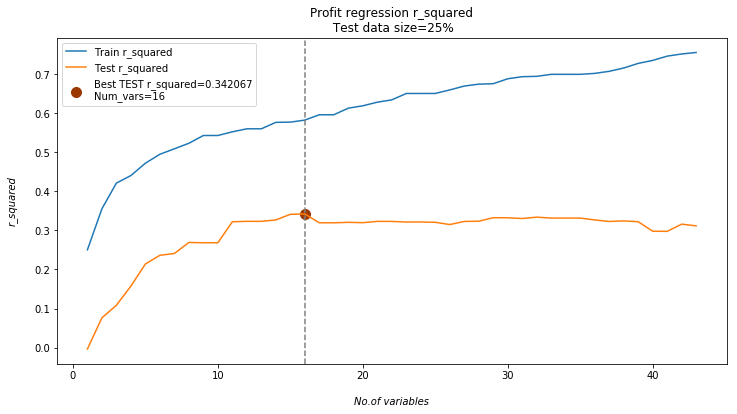

In [27]:
% matplotlib inline
max_r_squared_test=max(r_squared_test)
num_vars=r_squared_test.index(max_r_squared_test)+1

fig=plt.figure(figsize=(12,6))
plt.plot(range(1,max_vars+1),r_squared_train)
plt.plot(range(1,max_vars+1),r_squared_test)
plt.scatter(num_vars,max_r_squared_test,s=100,c=(155/255,55/255,0,1))
ax=fig.get_axes()[0]
ax.legend(["Train r_squared","Test r_squared","Best TEST r_squared={:.6f}\nNum_vars={}".format(max_r_squared_test,num_vars)])
plt.axvline(x=num_vars,ls="--",c='grey')
plt.title("Profit regression r_squared\n Test data size=25%")
ax.set_xlabel("No.of variables",size=10,labelpad=16,style="italic")
ax.set_ylabel("r_squared",size=10,labelpad=16,style="italic")


In [7]:
max(r_squared_test)

0.34206670823358787